# Tâche 7
- François Clinquart 
- NOMA : 59602100
- LMAPR1492 Physique des matéraiux 
DEADLINE : le lundi, 11 mars 2024 

## importation des modules nécessaires 

In [2]:
import numpy as np
from mp_api.client import MPRester
from pymatgen.core.operations import SymmOp
from pymatgen.symmetry.analyzer import SpacegroupAnalyzer
from pymatgen.electronic_structure.plotter import BSPlotter
from pymatgen.phonon.plotter import PhononBSPlotter
from jupyter_jsmol.pymatgen import quick_view
from lmapr1492 import plot_brillouin_zone, get_plot_bs, get_plot_dos, get_plot_bs_and_dos, get_branch_wavevectors
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import matplotlib.pyplot as plt 
## IMPORTATION IMPORTANTE
from pymatgen.analysis.diffraction.xrd import XRDCalculator
from pymatgen.electronic_structure.plotter import BSPlotter

# Mon Matériaux - le ScSnAu
Il s'agit d'un Cristal cubique de groupe ponctuel : -43m

In [3]:
mp_key = "ER5V8i0JUw7k31Nk5IpkvogP61BDz9cw"
mp_id = "mp-2894" #ScSnAu

In [4]:
with MPRester(mp_key) as m:
    elec_struct = m.get_bandstructure_by_material_id(mp_id)
    

Retrieving ElectronicStructureDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

# le Délivrable
pour analyser celle-ci à savoir:

- déterminer la bande interdite,

- trouver la direction dans laquelle la dernière (première) bande de valence (conduction) présente le plus et le moins de dispersion (insérer une figure indiquant la dispersion par des flèches),

- calculer la masse effective au sommet (base) de la dernière (première) bande de valence (conduction) en supposant une dispersion parabolique.


### 1) Détermination de la bande interdite 


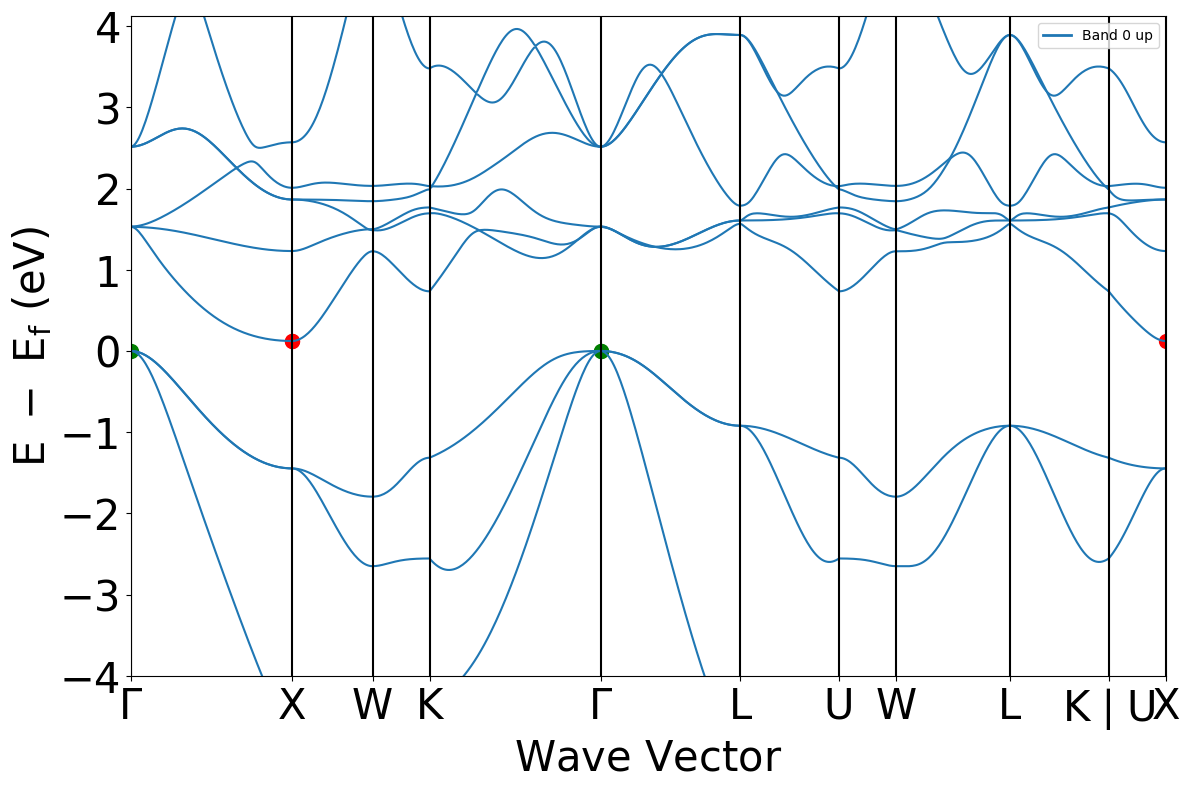

In [5]:
plot = BSPlotter(elec_struct)
plot.get_plot(vbm_cbm_marker=True)
data= plot.bs_plot_data()

In [6]:

band_gap = elec_struct.get_band_gap()

print("Épaisseur de la bande interdite : " + str(band_gap['energy']) + " eV")
print("Directe ? ", band_gap['direct'])



Épaisseur de la bande interdite : 0.12249999999999961 eV
Directe ?  False


- L'épaisseur de la bande interdite est de `0.12 [eV]`. Il s'agit de la distance sépérant le maximun de la bande de valence et le minimun de la bande conduction 

- La bande interdite n'est pas directe : Dans un matériau à bande indirecte, le minimum de la bande de conduction et le maximum de la bande de valence ne se trouvent pas au même vecteur d'onde. Pour qu'un électron passe de la bande de valence à la bande de conduction (ou l'inverse), il doit non seulement gagner ou perdre de l'énergie (sous forme de photon) mais aussi changer de vecteur d'onde, ce qui implique l'intervention d'un phonon (quantum de vibration du réseau cristallin) pour conserver la quantité de mouvement. Cette nécessité rend les transitions moins probables


In [7]:

data = BSPlotter(elec_struct).bs_plot_data()
E_zero = data.get('zero_energy')
print("Le maximun de la bande de valence est [eV]:", E_zero)
print("Le minimun de la bande de conduction est [eV] :", E_zero + band_gap['energy'])
print("Le vecteur de transition dans la bande interdite : " + str(band_gap['transition']))



Le maximun de la bande de valence est [eV]: 6.0624
Le minimun de la bande de conduction est [eV] : 6.1849
Le vecteur de transition dans la bande interdite : \Gamma-X


In [8]:
vbm = elec_struct.get_vbm()
print("Le maximun de la bande valence est  :" , vbm['band_index'].values()) 

cbm = elec_struct.get_cbm()
print("Le minimun de la bande de conduction :", cbm['band_index'].values()) 

Le maximun de la bande valence est  : dict_values([[15, 16, 17]])
Le minimun de la bande de conduction : dict_values([[18]])


La maximun de la bande valence est la bande 17 et le minimun de la bande de conduction est la bande 18 

### 2) trouver la direction dans laquelle la dernière (première) bande de valence (conduction) présente le plus et le moins de dispersion (insérer une figure indiquant la dispersion par des flèches)

le maximun de la bande de valence 

Pentes de la bande de valence : [1.50153665 0.72263916 1.40773556 1.28707251 1.1038663  0.66817229
 1.40773556 1.28252196 0.66817229 0.38576945]
Dispertion maximale 1.5015366451184544
Dispersion minimale 0.38576945156014575
Index de la pente maximale de la bande de valence : 0
Index de la pente minimale de la bande de valence : 9


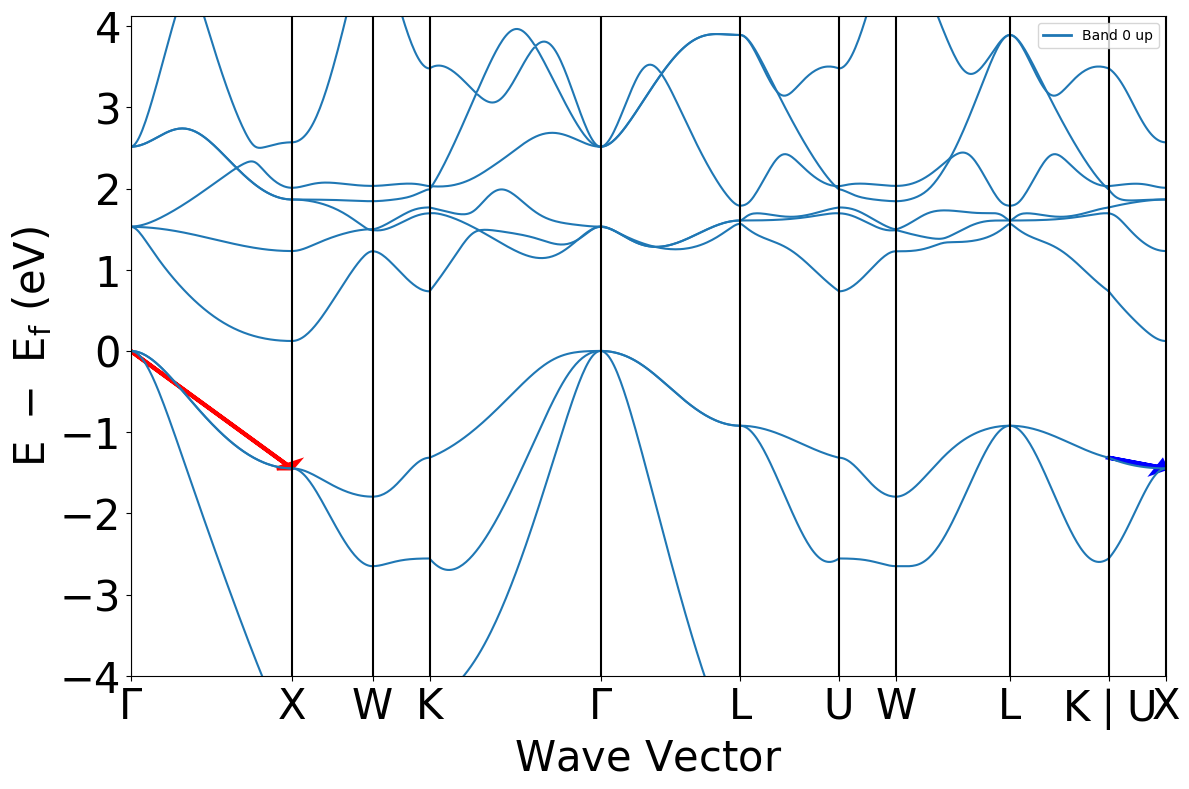

In [9]:
# Récupération des données d'énergie et de distance
energies = data.get('energy').get('1')
distances = np.unique(data.get('ticks').get('distance'))
valence_index = 17  # Index de la bande de valence

# Création d'une liste des énergies sur la bande de valence
energy_valence = []
num_steps = len(distances) - 1
energy_valence.append(energies[0][valence_index][0])

# Calcul des énergies pour chaque étape
for i in range(num_steps):
    energy_valence.append(energies[i][valence_index][-1])

# Calcul des pentes entre les points d'énergie
slopes_valence = np.zeros(num_steps)
for i in range(num_steps):
    slopes_valence[i] = abs((energy_valence[i+1] - energy_valence[i]) / (distances[i+1] - distances[i]))

# Affichage des pentes
print("Pentes de la bande de valence :", slopes_valence)

# Calcul de la pente maximale et minimale
max_slope_valence = max(slopes_valence)
min_slope_valence = min(slopes_valence)

print("Dispertion maximale", max_slope_valence)
print("Dispersion minimale", min_slope_valence)
index_max_slope_valence = np.where(slopes_valence == max_slope_valence)[0][0]
index_min_slope_valence = np.where(slopes_valence == min_slope_valence)[0][0]

# Affichage des indices des points correspondant aux pentes maximales et minimales
print("Index de la pente maximale de la bande de valence :", index_max_slope_valence)
print("Index de la pente minimale de la bande de valence :", index_min_slope_valence)

# Plot du diagramme de bande
plot.get_plot()

# Ajout de flèches pour indiquer les pentes maximales et minimales
plt.arrow(distances[index_max_slope_valence], energy_valence[index_max_slope_valence], 
          distances[index_max_slope_valence + 1] - distances[index_max_slope_valence], 
          energy_valence[index_max_slope_valence + 1] - energy_valence[index_max_slope_valence], 
          head_width=0.15, head_length=0.05, linewidth=3, color='r', length_includes_head=True)

plt.arrow(distances[index_min_slope_valence], energy_valence[index_min_slope_valence], 
          distances[index_min_slope_valence + 1] - distances[index_min_slope_valence], 
          energy_valence[index_min_slope_valence + 1] - energy_valence[index_min_slope_valence], 
          head_width=0.15, head_length=0.05, linewidth=3, color='b', length_includes_head=True)

plt.show()


Pour la bande de conduction minimale 

Pentes de la bande de valence : [1.45887582 2.29330504 1.4473694  0.77682342 0.0449457  1.40906044
 1.4473694  0.49659743 1.40906044 1.79585368]
Dispertion maximale 2.2933050350647806
Dispersion minimale 0.04494569609380148
Index de la pente maximale de la bande de valence : 1
Index de la pente minimale de la bande de valence : 4


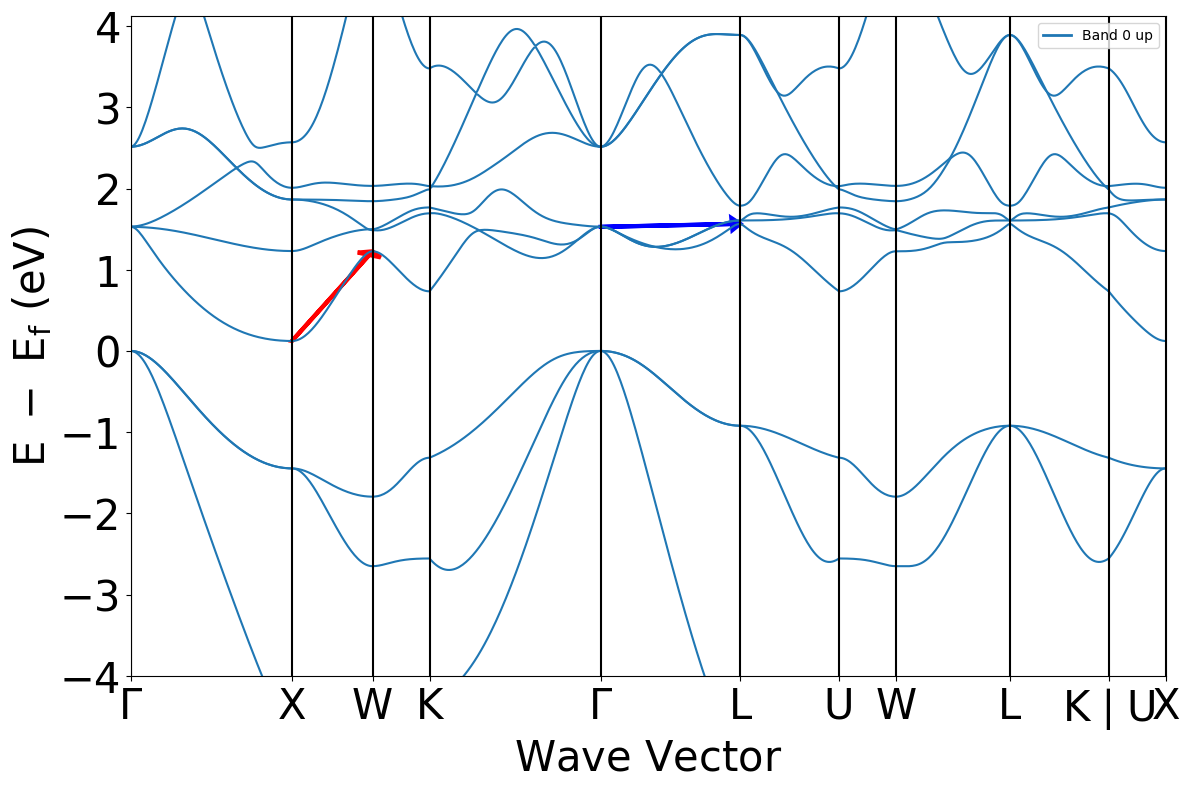

In [10]:
# Récupération des données d'énergie et de distance
energies = data.get('energy').get('1')
distances = np.unique(data.get('ticks').get('distance'))
valence_index = 18  # Index de la bande de valence

# Création d'une liste des énergies sur la bande de valence
energy_valence = []
num_steps = len(distances) - 1
energy_valence.append(energies[0][valence_index][0])

# Calcul des énergies pour chaque étape
for i in range(num_steps):
    energy_valence.append(energies[i][valence_index][-1])

# Calcul des pentes entre les points d'énergie
slopes_valence = np.zeros(num_steps)
for i in range(num_steps):
    slopes_valence[i] = abs((energy_valence[i+1] - energy_valence[i]) / (distances[i+1] - distances[i]))

# Affichage des pentes
print("Pentes de la bande de valence :", slopes_valence)

# Calcul de la pente maximale et minimale
max_slope_valence = max(slopes_valence)
min_slope_valence = min(slopes_valence)

print("Dispertion maximale", max_slope_valence)
print("Dispersion minimale", min_slope_valence)
index_max_slope_valence = np.where(slopes_valence == max_slope_valence)[0][0]
index_min_slope_valence = np.where(slopes_valence == min_slope_valence)[0][0]

# Affichage des indices des points correspondant aux pentes maximales et minimales
print("Index de la pente maximale de la bande de valence :", index_max_slope_valence)
print("Index de la pente minimale de la bande de valence :", index_min_slope_valence)

# Plot du diagramme de bande
plot.get_plot()

# Ajout de flèches pour indiquer les pentes maximales et minimales
plt.arrow(distances[index_max_slope_valence], energy_valence[index_max_slope_valence], 
          distances[index_max_slope_valence + 1] - distances[index_max_slope_valence], 
          energy_valence[index_max_slope_valence + 1] - energy_valence[index_max_slope_valence], 
          head_width=0.15, head_length=0.05, linewidth=3, color='r', length_includes_head=True)

plt.arrow(distances[index_min_slope_valence], energy_valence[index_min_slope_valence], 
          distances[index_min_slope_valence + 1] - distances[index_min_slope_valence], 
          energy_valence[index_min_slope_valence + 1] - energy_valence[index_min_slope_valence], 
          head_width=0.15, head_length=0.05, linewidth=3, color='b', length_includes_head=True)

plt.show()


Pour la bande de valence, la dispersion maximale est dans la direction `TX` et minimale dans 
la direction `UX`. Pour la bande de conduction, la dispersion maximale est dans la direction `WK` et minimale dans 
la direction `TL`

### 3) calculer la masse effective au sommet (base) de la dernière (première) bande de valence (conduction) en supposant une dispersion parabolique.

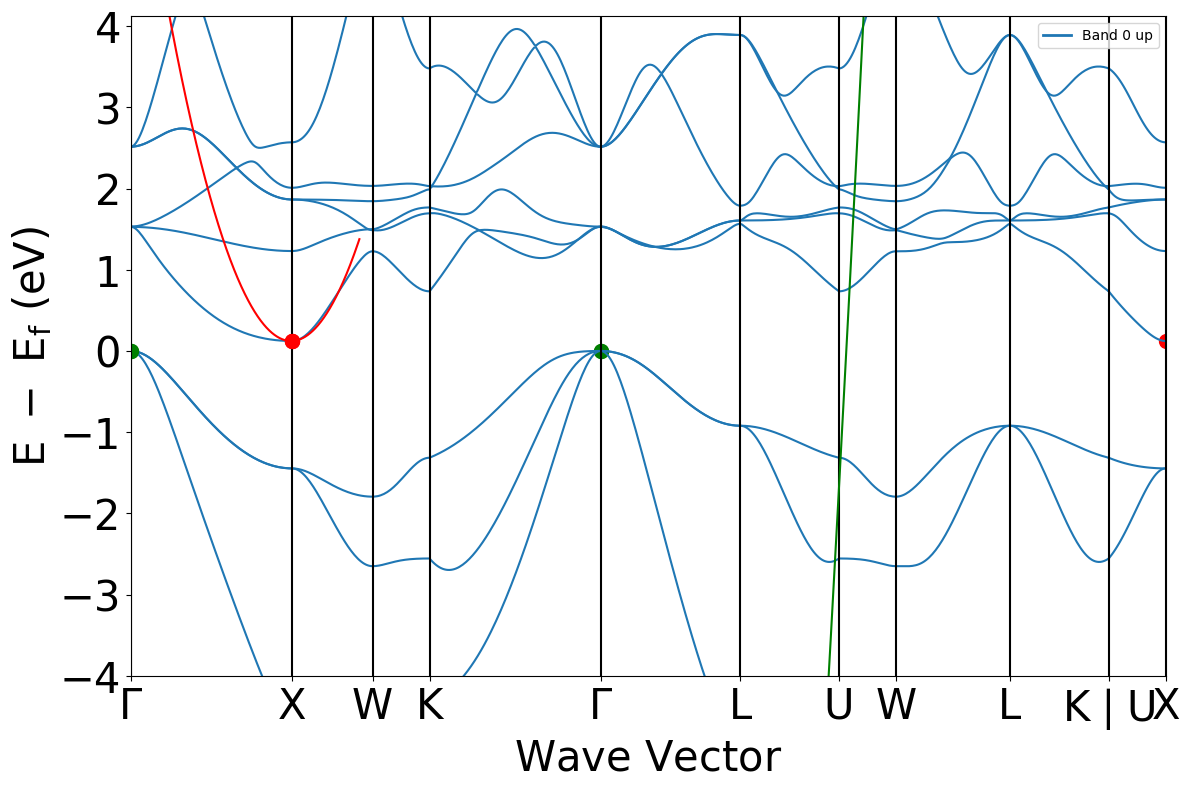

In [12]:
distances = data.get('distances')
energies = data.get('energy')

hbar = 6.582119570 * 1e-16  # Constante de Planck en eVs

vbm_coords = data.get("vbm")
cbm_coords = data.get("cbm")
  
plot.get_plot(vbm_cbm_marker=True)

# Marquage des sommets et des bases de nos bandes 
(vbm_x, vbm_y) = vbm_coords[0]
plt.plot(vbm_x, vbm_y, 'og', markersize=10)

(cbm_x, cbm_y) = cbm_coords[0]
plt.plot(cbm_x, cbm_y, 'or', markersize=10)

K = np.zeros(3)
E = np.zeros(3)

# Points pour la régression quadratique autour du VBM
K[0], E[0] = distances[4][-2], energies['1'][4][7][-2]
K[1], E[1] = vbm_coords[0]
K[2], E[2] = distances[6][1], energies['1'][6][17][1]

f_vbm = np.polyfit(K, E, 2) 
x = np.linspace(distances[4][0], distances[6][-1], 1000)
plt.plot(x, np.polyval(f_vbm, x), 'g')

# Points pour la régression quadratique autour du CBM
K[0], E[0] = distances[0][-2], energies['1'][0][18][-2] 
K[1], E[1] = cbm_coords[0] 
K[2], E[2] = distances[1][2], energies['1'][1][18][2]

f_cbm = np.polyfit(K, E, 2)
x = np.linspace(distances[0][10], distances[1][-9], 1000)
plt.plot(x, np.polyval(f_cbm, x), 'r')

plt.show()


In [13]:
# Calcul de la dérivée seconde de l'énergie par rapport au vecteur d'onde au CBM et VBM
second_derivative_energy_cbm = 2 * f_cbm[0]
second_derivative_energy_vbm = 2 * f_vbm[0]

# Calcul de la masse effective au CBM et VBM
# hbar est la constante de Planck réduite convertie en unités SI (Joule-secondes)
hbar_si = hbar * 1.60219e-19  # Conversion de eVs en Joules
effective_mass_cbm = (hbar_si**2) / (second_derivative_energy_cbm * 9.10938356e-31)  # masse effective en unités de masse d'électron
effective_mass_vbm = (hbar_si**2) / (second_derivative_energy_vbm * 9.10938356e-31)


print("La masse effective au CBM est : {:.2e} m_e".format(effective_mass_cbm))
print("La masse effective au VBM est : {:.2e} m_e".format(effective_mass_vbm))



La masse effective au CBM est : 8.08e-40 m_e
La masse effective au VBM est : 6.70e-40 m_e


Ma parabole a un soucis cela viens de fait que je ne comprends pas comment implèmenter les points autour de vbm et mes masses effectives sont vraiment très légères 